用直接II型实现系统函数如下的IIR数字滤波器，并求单位脉冲响应和单位阶跃响应：

$H(z)=\frac{\sum_{r=0}^{M}b_{r}z^{-r}}{\sum_{k=0}^{N}a_{k}z^{-k}}=\frac{1-3z^{-1}+11z^{-2}+27z^{-3}+18z^{-4}}{16+12z^{-1}+2z^{-2}-4z^{-3}-2z^{-4}}$

In [8]:
#导入使用的库
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [9]:
#差分方程参数设置
b = np.array([[1,0,0,0,0],[1,-3,11,27,18]]) #分子参数
a = np.array([[16,12,2,-4,-2],[1,0,0,0,0]]) #分母参数

In [10]:
#输入信号
M = a.shape[0]
N = 30
delta = signal.unit_impulse(N) #单位采样信号
y = np.ones(N) #单位阶跃信号

In [11]:
#IIR 直接II型滤波器
z1 = np.zeros((M+1,N));z2 = np.zeros((M+1,N));
z1[0,:] = delta;z2[0,:] = y; 
for i in range(M): #循环滤波，计算最终结果
    zi = signal.lfilter_zi(b[i,:],a[i,:])*0 #零状态条件
    z1[i+1,:],_ = signal.lfilter(b[i,:],a[i,:],z1[i,:],zi=zi);
    z2[i+1,:],_ = signal.lfilter(b[i,:],a[i,:],z2[i,:],zi=zi);

单位脉冲响应和单位阶跃响应如下：

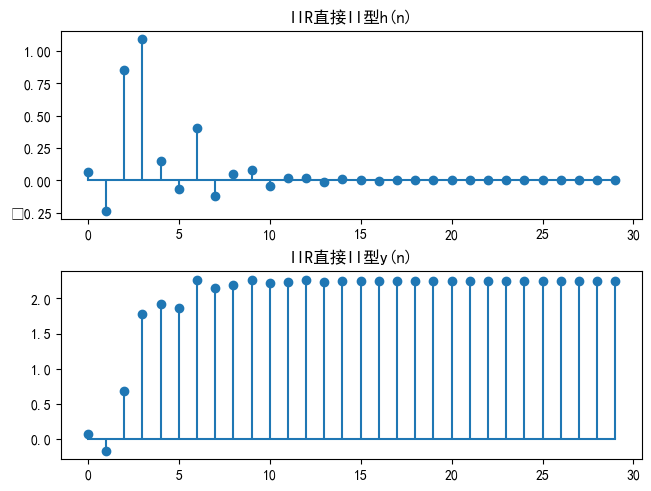

C:\Users\hp\AppData\Local\Temp\ipykernel_18240\299438423.py:7: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.show();fig.savefig('./iir_dir_II_sequence.png',dpi=500)


In [12]:
#画图
fig,axs = plt.subplots(2,1,constrained_layout=True)
axs[0].stem(z1[M,:],basefmt="");axs[1].stem(z2[M,:],basefmt="")
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
axs[0].set_title('IIR直接II型h(n)')
axs[1].set_title('IIR直接II型y(n)')
plt.show();fig.savefig('./iir_dir_II_sequence.png',dpi=500)